<a href="https://colab.research.google.com/github/SergeiNevolin/jupyter_notebooks/blob/main/%D0%9D%D0%B5%D0%B2%D0%BE%D0%BB%D0%B8%D0%BD_%D0%A1%D0%B5%D1%80%D0%B3%D0%B5%D0%B9_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%BA_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D1%8E_14%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практика

## Предсказание оттока телеком компании

#### Что такое "скорость оттока"?

Коэффициент оттока - это процент подписчиков на услугу, которые прекращают свою подписку на услугу в течение заданного периода времени. Для того чтобы компания могла расширить свою клиентуру, ее темпы роста, измеряемые числом новых клиентов, должны превышать темпы оттока. Этот показатель обычно выражается в процентах.

#### Почему отток так важен?

Отток клиентов - это термин, используемый в компаний с подписочной моделью ведения бизнеса, для описания потери клиентов. Например, если 10 из 100 подписчиков интернет-провайдера (ISP) отменили свои подписки, скорость оттока для этого провайдера составит 10%.

Отток важен, потому что он напрямую влияет на прибыльность вашего сервиса. Принято считать, что прибыльность услуги напрямую связана с ростом ее клиентской базы. Это может привести владельцев бизнеса к выводу, что для того, чтобы увеличить свою клиентскую базу, скорость приобретения новых клиентов должна превышать скорость оттока.

#### Что из себя представляет датасет?

Датасет представляет из себя 3333 записи из истории компании о клиентах с 20 колонками. Каждая колонка описывает клиента - его штат проживания, время использования услуги, номер, перечень подписок, время разговора, прочее.

##### Более конкретно
-   State: штат США, в котором проживает клиент, обозначенный двухбуквенным сокращением; например, OH или NJ
-   Account Length: количество дней, в течение которых этот аккаунт был активным
-   Area Code: трехзначный код города соответствующего номера телефона клиента
-   Phone: оставшийся семизначный номер телефона
-   Int’l Plan: есть ли у клиента международный тарифный план: да / нет
-   VMail Plan: есть ли у клиента функция голосовой почты: да / нет
-   VMail Message: предположительно среднее количество сообщений голосовой почты в месяц
-   Day Mins: общее количество минут, использованных в течение дня
-   Day Calls: общее количество звонков за день
-   Day Charge: оплачиваемая стоимость дневных звонков
-   Eve Mins, Eve Calls, Eve Charge: оплачиваемая стоимость звонков, сделанных в течение вечера
-   Night Mins, Night Calls, Night Charge: оплачиваемая стоимость звонков в ночное время
-   Intl Mins, Intl Calls, Intl Charge: расчетная стоимость международных звонко
-   CustServ Calls: количество звонков в службу поддержки
-   Churn?: клиент ушёл: да / нет

------

## Загрузка данных

Клонируем файлы с гита

In [ ]:
!git clone https://github.com/tixonsit/Sberbank_materials.git

Cloning into 'Sberbank_materials'...
remote: Enumerating objects: 45, done.
remote: Total 45 (delta 0), reused 0 (delta 0), pack-reused 45
Unpacking objects: 100% (45/45), done.
Checking out files: 100% (20/20), done.


Загружаем все необходимые библиотеки

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

[Открываем](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) склонированную папку

In [ ]:
df = pd.read_csv('/content/Sberbank_materials/telecom_churn.csv')

[Отображаем](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) данные

In [ ]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


В случае, если вы работаете из среды анаконда - вам необходимо положить файл рядом с ноутбуком и выполнить:

```
df = pd.read_csv('./telecom_churn.csv')
```

 

## Работа с признаками

#### Визуальный анализ

Изучим наши данные, какие признаки исходного датасета никак не повлияют на результат прогноза? Выбросим такие столбцы и отобразим результат.

In [ ]:
df = df.drop(['phone number'],axis=1)
df.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Посмотрим на описательную статистику, которая суммирует центральную тенденцию, дисперсию и форму распределения набора данных. Корректно ли все заполнено?

In [ ]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Посмотрим на типы данных наших столбцов:

In [ ]:
df.dtypes

state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

#### Работа с категориальными признаками

Если вы не понимаете логику за работой с категориальными признаками - посмотрите [сюда](https://www.coursera.org/lecture/supervised-learning/rabota-s-katieghorial-nymi-priznakami-pqU2j), если же не знаете как это сделать в коде - [сюда](https://colab.research.google.com/drive/17UJ3zkE6dUL5UpQnLiaQp3f7BpV6iEss#scrollTo=_238K7-NQajf), пункт про категориальные признаки.

Посмотрим на те колонки, в которых тип данных object (строка) и перекодируем их, воспользуемся кодом с занятия.

In [ ]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Отобразим сами энкодеры

In [ ]:
encoders

{'international plan': LabelEncoder(),
 'state': LabelEncoder(),
 'voice mail plan': LabelEncoder()}

Выделим целевую переменную в бинарный формат и выкенем ее из обучающей выборки.

In [ ]:
y = encoded_data['churn'].map({True: 1, False: 0}).values
encoded_data.drop(['churn'], axis = 1, inplace=True)
print('Ответы\n',y)
print('Обучающая выборка')
encoded_data.head()

Ответы
 [0 0 0 ... 0 0 0]
Обучающая выборка


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


Посмотрим на распределение велечин по признакам в наших данных

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84a7f67f90>,
      dtype=object)

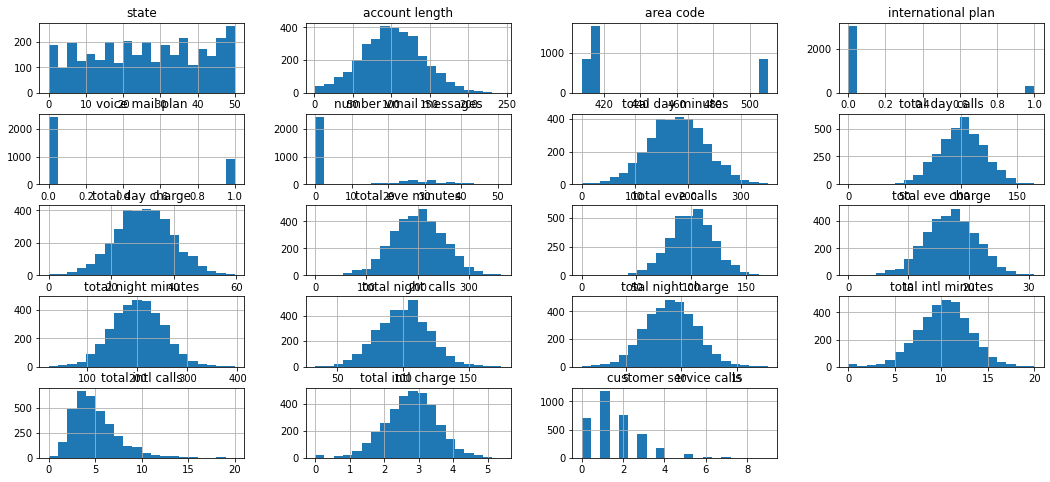

In [ ]:
encoded_data.hist(figsize=(18, 8), layout=(5,4), bins=20)

Посмтроим матрицу корреляций, выбросим данные с единичной линейной зависимостью - они (шум) просто повысят вычислительную сложность.

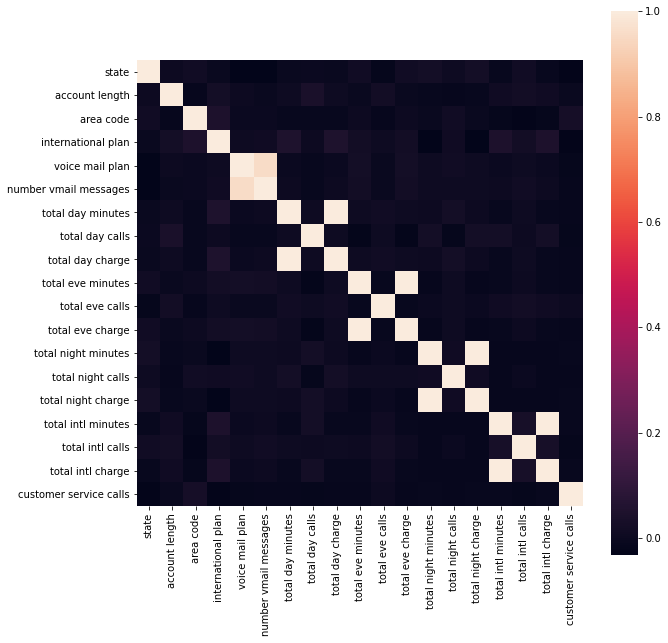

In [ ]:
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [ ]:
encoded_data.drop(['total day charge',
                   'total eve charge',
                   'total night charge',
                   'total intl charge'], axis = 1, inplace=True)
encoded_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


## Работа с моделью
Теперь, когда данные приведены к числовой форме, мы можем переходить к построению модели.

Необходимо довести до конца процесс
1.  Загрузка данных
2.  Подготовка данных
3.  Разбиение на обучение и тест
4.  Оценка работы модели на кросс валидации
5.  Выбор наилучшего набора параметров на основе кросс валидации
6.  Обучение модели на всем наборе данных для обучения
7.  Сбор метрик на обучении и тесте
8.  Принятие решения


Часть шагов мы уже сделали выше. 

Выберите одно из семейств рассмотренных на занятии моделей, и попробуйте получить как можно более хороший результат на тестовой выборке по метрике accuracy.

In [ ]:
# ваш код тут

**Разбиение на обучение и тест**

In [ ]:
#Разбиение на обучение и тест
from sklearn import model_selection
train_data, test_data, train_labels, test_labels = model_selection.train_test_split(encoded_data, y, test_size=0.3, stratify=y)

**Оценка работы модели на кросс валидации**

In [ ]:
#Оценка работы модели на кросс валидации
X_train = train_data
y_train = train_labels
X_test = test_data
y_test = test_labels

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [ ]:
# В sklearn есть специальный модуль для работы с кросс-валидацией
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

dt = DecisionTreeClassifier()
# Зададим сетку - среди каких значений выбирать наилучший параметр.
dt_grid = {'max_depth': np.array(np.linspace(1, 25, 25), dtype='int')} # перебираем по параметру <<n_neighbors>>, по сетке заданной np.linspace(2, 100, 10)
# Создаем объект кросс-валидации
gs = GridSearchCV(dt, dt_grid, cv=5, return_train_score=True)
# Обучаем его
gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  

In [ ]:
def grid_plot(single_param_range, train_results, test_results, x_label, title, y_label):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(single_param_range, train_results, 'go-', label="Train")
    plt.plot(single_param_range, test_results, 'bo-', label="Test")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    plt.title(title)

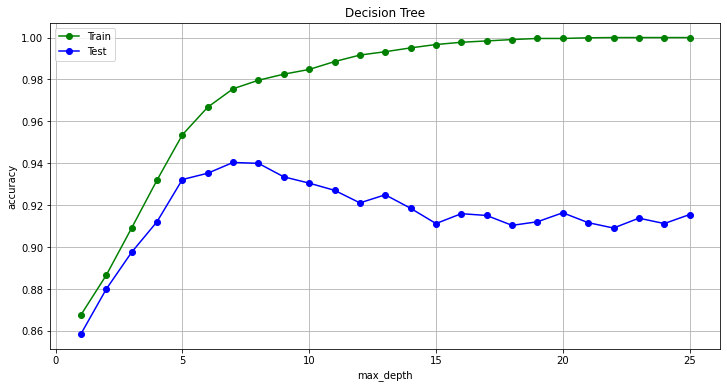

In [ ]:
grid_plot(dt_grid['max_depth'], gs.cv_results_['mean_train_score'], gs.cv_results_['mean_test_score'], 'max_depth', 'Decision Tree', 'accuracy')

**Выбор наилучшего набора параметров на основе кросс валидации**

In [ ]:
print(gs.best_params_, gs.best_score_)

{'max_depth': 7} 0.9404196266921543


**Обучение модели на всем наборе данных для обучения**

In [ ]:
model = DecisionTreeClassifier(max_depth=7)
model.fit(train_data, train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Сбор метрик на обучении и тесте**

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
print("On train set: {}".format(accuracy_score(train_labels, model.predict(train_data))))
print("On test set: {}".format(accuracy_score(test_labels, model.predict(test_data))))

On train set: 0.9734247749678525
On test set: 0.937


Модель работает неплохо и дает правильный ответ в 93% случаев

### Вопросы напоследок


1.   Корректно ли использование метрики accuracy для данной задачи? Если нет, то почему?
2.   **Доп. задача**. Исследуйте влияние [масштабирования признаков](https://qna.habr.com/q/290049) на результат работы вашей модели (нужно преобразовать данные, и обучить на них новую модель). Для этого удобно использовать метод sklearn.preprocessing.StandardScaler(). Результат исследований приведите в клетках ниже.



1. Использование метрики accuracy корректно

In [ ]:
encoded_data

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,0,1,36,156.2,77,215.5,126,279.1,83,9.9,6,2
3329,49,68,415,0,0,0,231.1,57,153.4,55,191.3,123,9.6,4,3
3330,39,28,510,0,0,0,180.8,109,288.8,58,191.9,91,14.1,6,2
3331,6,184,510,1,0,0,213.8,105,159.6,84,139.2,137,5.0,10,2


In [ ]:
new = encoded_data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
new = scaler.fit_transform(new)
new

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.08500823,
        -0.60119509, -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ...,  1.24048169,
        -0.60119509, -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.70312091,
         0.21153386, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  1.3837779 ,
         0.61789834,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ..., -1.87621082,
         2.24335625,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ...,  1.24048169,
        -0.19483061, -1.1882185 ]])

In [ ]:
new_train_data, new_test_data, new_train_labels, new_test_labels = model_selection.train_test_split(new, y, test_size=0.3, stratify=y)

In [ ]:
new_model = DecisionTreeClassifier(max_depth=7)
new_model.fit(new_train_data, new_train_labels)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
print("On train set: {}".format(accuracy_score(new_train_labels, new_model.predict(new_train_data))))
print("On test set: {}".format(accuracy_score(new_test_labels, new_model.predict(new_test_data))))

On train set: 0.9691384483497643
On test set: 0.929


Как видим, результаты не улучшились, так как используется алгоритм Decision Tree, который не чувствителен к масштабированию данных, как KNN.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
new_knn_model = KNeighborsClassifier()

In [ ]:
new_knn_model.fit(new_train_data, new_train_labels)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
print("On train set: {}".format(accuracy_score(new_train_labels, new_knn_model.predict(new_train_data))))
print("On test set: {}".format(accuracy_score(new_test_labels, new_knn_model.predict(new_test_data))))

On train set: 0.911701671667381
On test set: 0.882


In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(train_data, train_labels)
print("On train set: {}".format(accuracy_score(train_labels, knn_model.predict(train_data))))
print("On test set: {}".format(accuracy_score(test_labels, knn_model.predict(test_data))))

On train set: 0.894127732533219
On test set: 0.873


Для KNN результаты немного улучшились после масштабирования данных